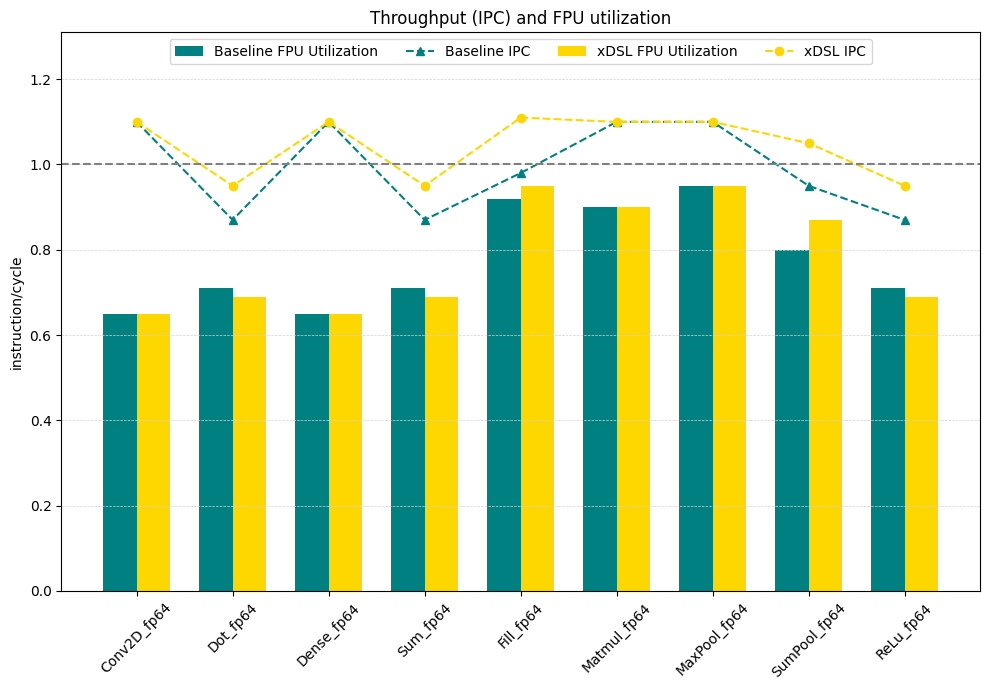

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with open('data.csv') as f:
    df = pd.read_csv(f, sep=",", skipinitialspace=True)

# Styling
COLORS = {"baseline": "teal", "xdsl": "gold"}
MARKERS = {"baseline": "^", "xdsl": "o"}

# Get unique 'name' values as bins
bins = df["name"].unique()
num_bins = len(bins)

# Group by 'name'
grouped = df.groupby("name")

# Prepare data for plotting
x_values = np.arange(num_bins)  # X-axis positions
bar_width = 0.35  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars for each group
for i, (name, group) in enumerate(grouped):
    ax.bar(
        x_values[i] - bar_width / 2,
        group["fpss_fpu_occupancy"].values[0],
        width=bar_width,
        label=name + "_baseline",
        color=COLORS["baseline"],
    )
    ax.bar(
        x_values[i] + bar_width / 2,
        group["fpss_fpu_occupancy"].values[1],
        width=bar_width,
        label=name + "_xdsl",
        color=COLORS["xdsl"],
    )

# Plot IPC lines for each group
baseline_ipc_y = [group["total_ipc"].values[0] for _, group in grouped]
xdsl_ipc_y = [group["total_ipc"].values[1] for _, group in grouped]
ax.plot(
    x_values,
    baseline_ipc_y,
    linestyle="--",
    marker=MARKERS["baseline"],
    color=COLORS["baseline"],
    zorder=0,
)
ax.plot(
    x_values,
    xdsl_ipc_y,
    linestyle="--",
    marker=MARKERS["xdsl"],
    color=COLORS["xdsl"],
    zorder=0,
)

# Draw a horizontal line at y=1
ax.axhline(y=1, color="grey", linestyle="--")

# Add grid
ax.grid(axis="y", color="lightgrey", linestyle="--", linewidth=0.5)

# Set y-axis limits to make room for the legend
y_max = max(df["total_ipc"].max(), df["fpss_fpu_occupancy"].max())
ax.set_ylim(0, y_max + 0.2)  # Manipulate the range of the y-axis

# Plot legend
ax.legend(
    loc="upper center",
    ncol=4,
    handles=[
        Patch(facecolor=COLORS["baseline"], label="Baseline FPU Utilization"),
        Line2D(
            [0],
            [0],
            color=COLORS["baseline"],
            linestyle="--",
            marker=MARKERS["baseline"],
            label="Baseline IPC",
        ),
        Patch(facecolor=COLORS["xdsl"], label="xDSL FPU Utilization"),
        Line2D(
            [0],
            [0],
            color=COLORS["xdsl"],
            linestyle="--",
            marker=MARKERS["xdsl"],
            label="xDSL IPC",
        ),
    ],
)
# Set x-axis ticks and labels
ax.set_xticks(x_values)
ax.set_xticklabels(bins, rotation=45)
ax.set_ylabel("instruction/cycle")
ax.set_title("Throughput (IPC) and FPU utilization")
plt.tight_layout()
plt.savefig("images/throughput.png")
plt.savefig("images/throughput.pdf")
plt.show()